In This notebook we plot the Features in `user_master` to have an idea of their distribution

In [1]:
import warnings
warnings.filterwarnings("ignore")

%pylab inline
%load_ext autoreload
%autoreload 2

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row, SQLContext
from pyspark import SparkContext, SparkConf

# In Jupyter you have to stop the current context first
# sc.stop()

# Create new config
conf = SparkConf().set("spark.driver.maxResultSize", "20g")

sc = SparkContext(appName="PythonExplorer", sparkHome="/usr/local/spark", conf=conf)    
sqlContext = SQLContext(sc)


In [3]:
user_master  = sqlContext.read.csv("data/user_master.tsv",sep="\t", header=True) 

In [58]:
df = KMeansTrainer.make_features(user_master)

In [13]:
small, train, test, val = user_master.randomSplit([0.1,0.5, 0.2, 0.1], seed=42)
print(f"Small Dataset Count: {small.count():,}")

Small Dataset Count: 182,674


In [14]:
def spark_to_pandas(spark_df, take=5):
  if take==-1:
    return pd.DataFrame(spark_df.collect(), columns=spark_df.columns)
  return pd.DataFrame(spark_df.take(take), columns=spark_df.columns)

In [15]:
c = "feature1"
count = small.groupBy(c).count()
spark_to_pandas(count, -1)

,feature1,count
0,A2,51656
1,A3,1
2,A1,131017


<BarContainer object of 47 artists>

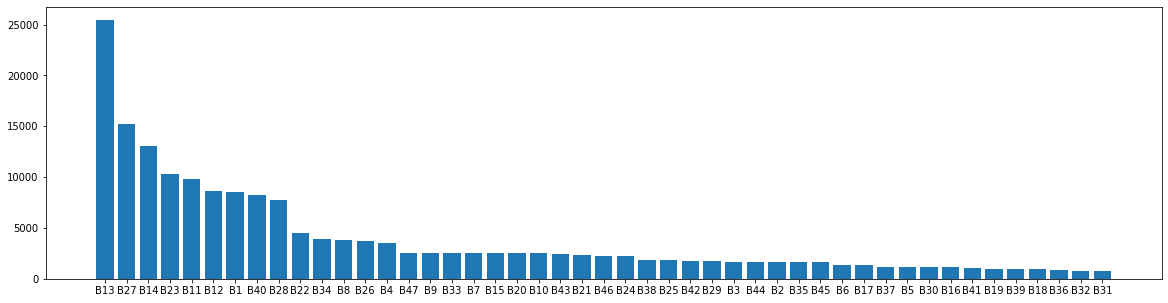

In [16]:
c = "feature2"
count = small.groupBy(c).count()
spark_to_pandas(count)
col_count = spark_to_pandas(count, -1)
col_count.sort_values("count", inplace=True, ascending=False)
_ = plt.figure(figsize=(20,5))
plt.bar(col_count[c],col_count["count"])

<BarContainer object of 11 artists>

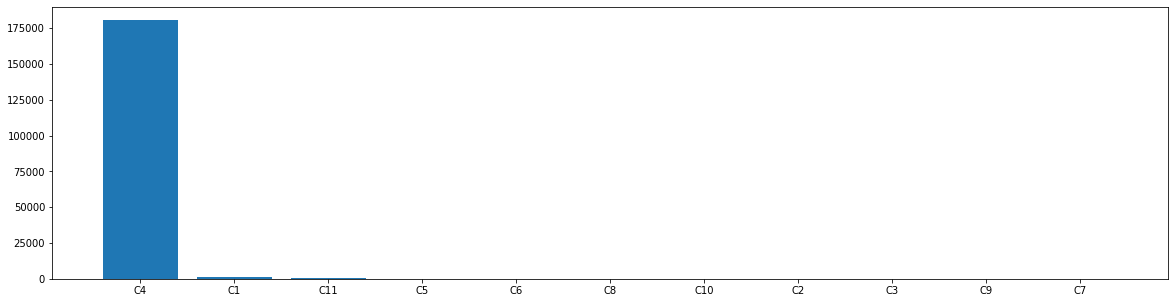

In [17]:
c = "feature3"
count = small.groupBy(c).count()
spark_to_pandas(count)
col_count = spark_to_pandas(count, -1)
col_count.sort_values("count", inplace=True, ascending=False)
_ = plt.figure(figsize=(20,5))
plt.bar(col_count[c],col_count["count"])

<BarContainer object of 2 artists>

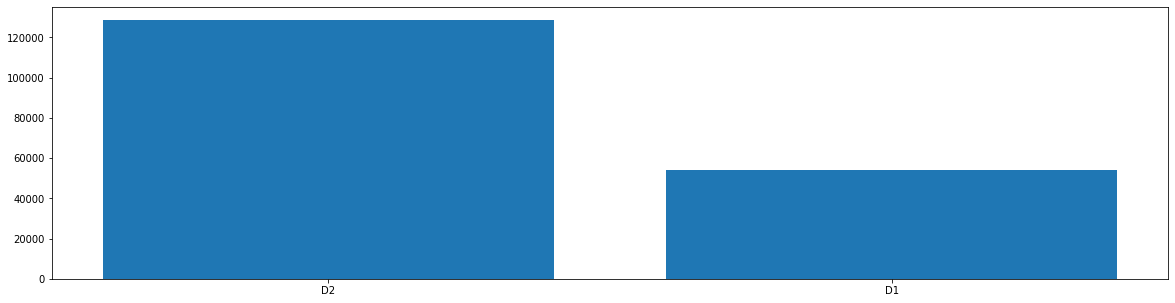

In [18]:
c = "feature4"
count = small.groupBy(c).count()
spark_to_pandas(count)
col_count = spark_to_pandas(count, -1)
col_count.sort_values("count", inplace=True, ascending=False)
_ = plt.figure(figsize=(20,5))
plt.bar(col_count[c],col_count["count"])

<BarContainer object of 11 artists>

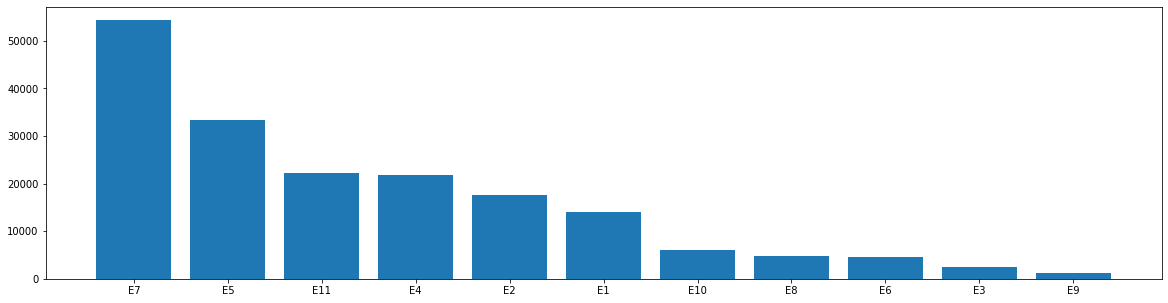

In [19]:
c = "feature5"
count = small.groupBy(c).count()
spark_to_pandas(count)
col_count = spark_to_pandas(count, -1)
col_count.sort_values("count", inplace=True, ascending=False)
_ = plt.figure(figsize=(20,5))
plt.bar(col_count[c],col_count["count"])

<BarContainer object of 10 artists>

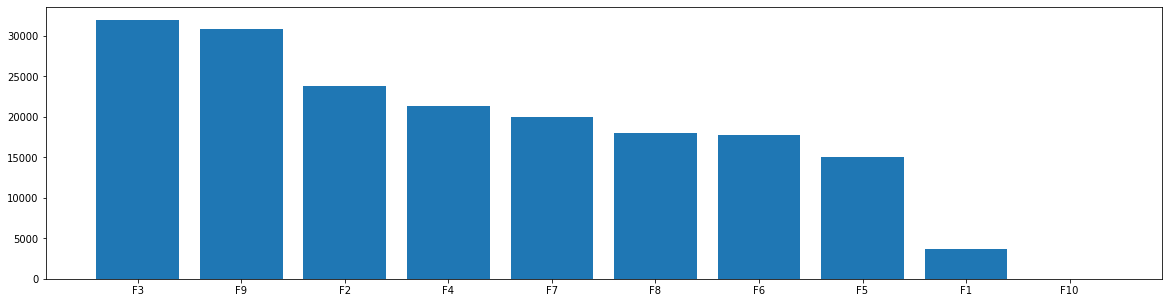

In [20]:
c = "feature6"
count = small.groupBy(c).count()
spark_to_pandas(count)
col_count = spark_to_pandas(count, -1)
col_count.sort_values("count", inplace=True, ascending=False)
_ = plt.figure(figsize=(20,5))
plt.bar(col_count[c],col_count["count"])